In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scanpy as sc
from matplotlib import rc_context

In [31]:
sns.set_theme(style='white')

In [63]:
os.chdir('/home/wu/datb1/AutoExtractSingleCell/AutoExtract_article_new')

In [32]:
rename_dict = {
    'cellhint_time' : 'CellHint',
    'cellhint_prior_time' : 'CellHint (prior)',
    'scanorama_time' : 'Scanorama',
    'scanorama_prior_time' : 'Scanorama (prior)',
    'original_total_time' : 'S+CH',
    'total_prior_time' : 'S+CH (prior)'}

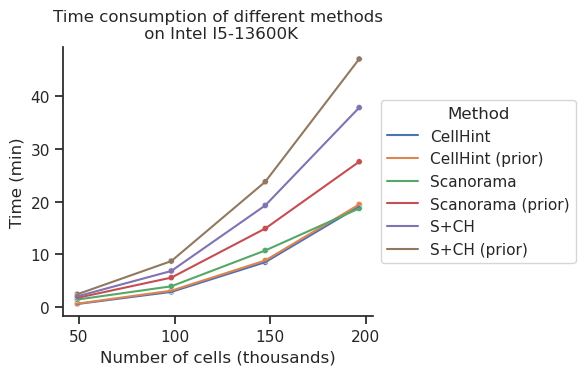

In [65]:
df_time = pd.read_csv('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/time_usage/performance_results.csv')
df_time['original_total_time'] = df_time['cellhint_time'] + df_time['scanorama_time']
df_time = df_time.melt(id_vars=['n_datasets', 'n_cells'], var_name='method_type', value_name='time')
df_time['method_type'] = df_time['method_type'].replace(rename_dict)
df_time['time'] = df_time['time'] / 60
df_time['n_cells'] = df_time['n_cells'] / 1000

plt.figure(figsize=(4, 3.5))
g = sns.lineplot(data=df_time, x='n_cells', y='time', hue='method_type', hue_order=rename_dict.values())
# move legend outside
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Method')
g = sns.scatterplot(data=df_time, x='n_cells', y='time', hue='method_type', marker='o', s=20, legend=False, hue_order=rename_dict.values())
sns.despine()
g.yaxis.set_ticks_position('left')
g.xaxis.set_ticks_position('bottom')
g.set_ylabel('Time (min)')
g.set_xlabel('Number of cells (thousands)')
g.set_title('Time consumption of different methods\n on Intel I5-13600K')

plt.savefig('figures/fig5/time_consumption_on_pc.pdf', bbox_inches='tight')

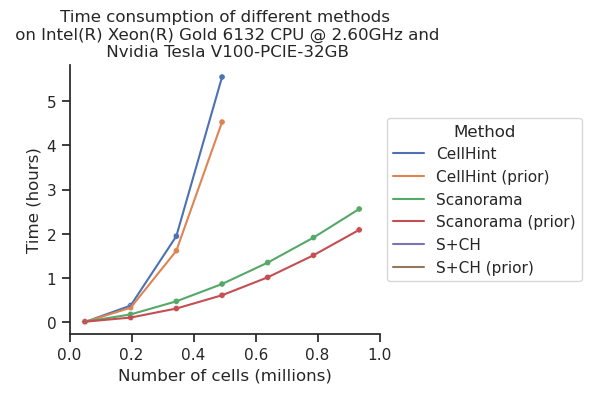

In [66]:
df_time = pd.read_csv('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/time_usage/gpu_performance_results.csv')
df_time = df_time.melt(id_vars=['n_datasets', 'n_cells'], var_name='method_type', value_name='time')
df_time['method_type'] = df_time['method_type'].replace(rename_dict)
df_time['time'] = df_time['time'] / 60 / 60
df_time['n_cells'] = df_time['n_cells'] / 1000000

plt.figure(figsize=(4, 3.5))
g = sns.lineplot(data=df_time, x='n_cells', y='time', hue='method_type', hue_order=rename_dict.values())
# move legend outside
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Method')
g = sns.scatterplot(data=df_time, x='n_cells', y='time', hue='method_type', marker='o', s=20, legend=False, hue_order=rename_dict.values())
sns.despine()
g.set_xlim(0, 1)
g.yaxis.set_ticks_position('left')
g.xaxis.set_ticks_position('bottom')
g.set_ylabel('Time (hours)')
g.set_xlabel('Number of cells (millions)')
g.set_title('Time consumption of different methods\n on Intel(R) Xeon(R) Gold 6132 CPU @ 2.60GHz and\n Nvidia Tesla V100-PCIE-32GB')

plt.savefig('figures/fig5/time_consumption_on_server_with_gpu.pdf', bbox_inches='tight')